<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-17 17:27:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.3’

m4_survey_data.sqli 100%[===================>]  34.98M  36.3MB/s    in 1.0s    

2024-08-17 17:27:28 (36.3 MB/s) - ‘m4_survey_data.sqlite.3’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import matplotlib as mlt
from matplotlib import pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [92]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
df2 = pd.read_sql_query(QUERY,conn)
df2.Table_Name.tolist()

['EduOther',
 'DevType',
 'LastInt',
 'JobFactors',
 'WorkPlan',
 'WorkChallenge',
 'LanguageWorkedWith',
 'LanguageDesireNextYear',
 'DatabaseWorkedWith',
 'DatabaseDesireNextYear',
 'PlatformWorkedWith',
 'PlatformDesireNextYear',
 'WebFrameWorkedWith',
 'WebFrameDesireNextYear',
 'MiscTechWorkedWith',
 'MiscTechDesireNextYear',
 'DevEnviron',
 'Containers',
 'SOVisitTo',
 'SONewContent',
 'Gender',
 'Sexuality',
 'Ethnicity',
 'master']

## Demo: How to run a group by query


In [8]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
df3=pd.read_sql_query(QUERY,conn)

## Demo: How to describe a table


In [55]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])
#df.iat[0,0].shape

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<Figure size 1000x600 with 0 Axes>

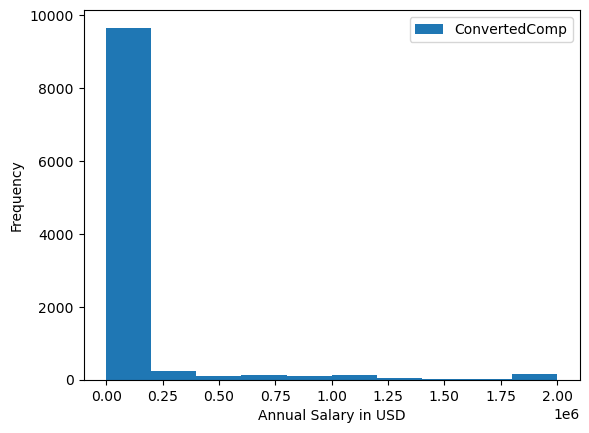

In [25]:
# your code goes here
QUERY_ConvertedComp = '''SELECT ConvertedComp FROM master'''
df_ConvertedComp = pd.read_sql_query(QUERY_ConvertedComp, conn)
df_ConvertedComp.head()
plt.figure(figsize=(10,6))
df_ConvertedComp.plot.hist()
plt.xlabel('Annual Salary in USD')
plt.ylabel('Frequency')
plt.title('')
plt.show()

### Box Plots


Plot a box plot of `Age.`


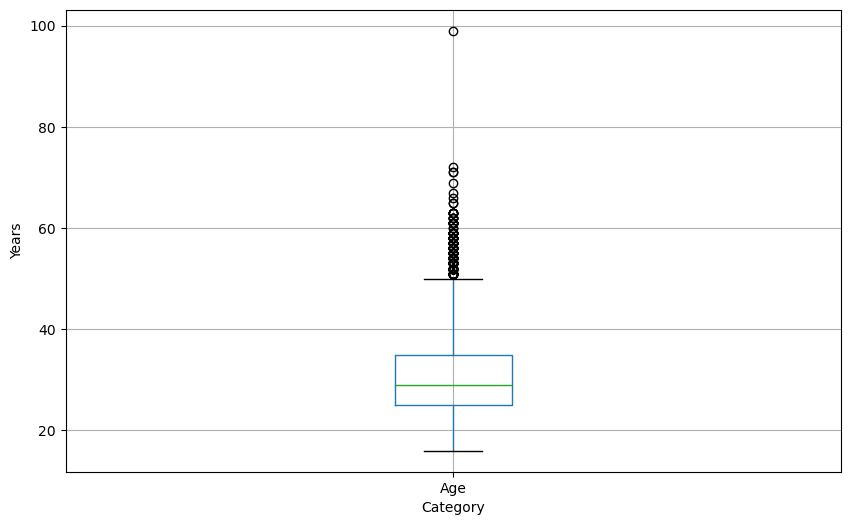

In [27]:
# your code goes here
QUERY_Age = '''SELECT Age fROM master'''

df_Age = pd.read_sql_query(QUERY_Age, conn)

plt.figure(figsize=(10,6))
df_Age.boxplot()
plt.xlabel('Category')
plt.ylabel('Years')
plt.title('')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


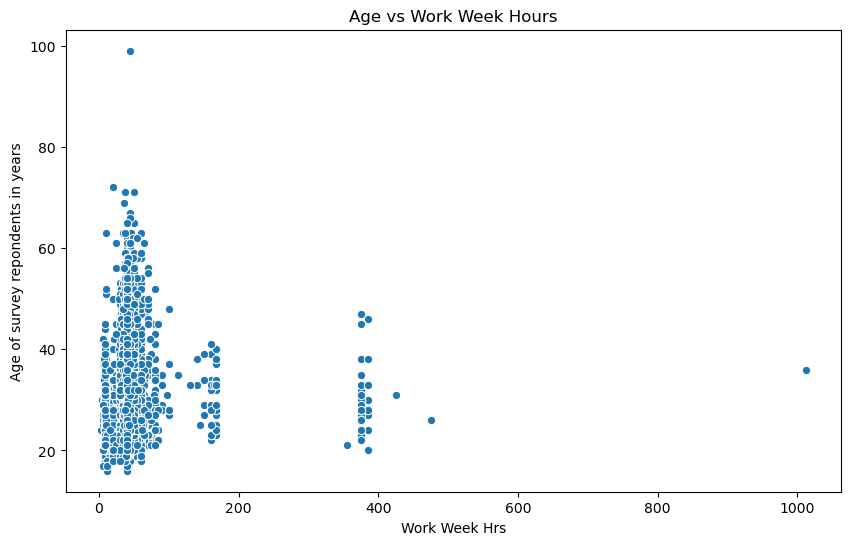

In [189]:
# your code goes here
#get all the data
QUERY_data = '''SELECT * FROM master'''

df_data = pd.read_sql_query(QUERY_data, conn)

plt.figure(figsize=(10,6))
sns.scatterplot(y='Age', x='WorkWeekHrs', data=df_data)
plt.ylabel('Age of survey repondents in years')
plt.xlabel('Work Week Hrs')
plt.title('Age vs Work Week Hours')
plt.show()

#from scipy import stats
#p_coef, p = stats.pearsonr(df_data['Age'],df_data['WorkWeekHrs'])


In [185]:
df_data[['Age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     11111 non-null  float64
dtypes: float64(1)
memory usage: 89.2 KB


In [186]:
df_data[['WorkWeekHrs']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WorkWeekHrs  11276 non-null  float64
dtypes: float64(1)
memory usage: 89.2 KB


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


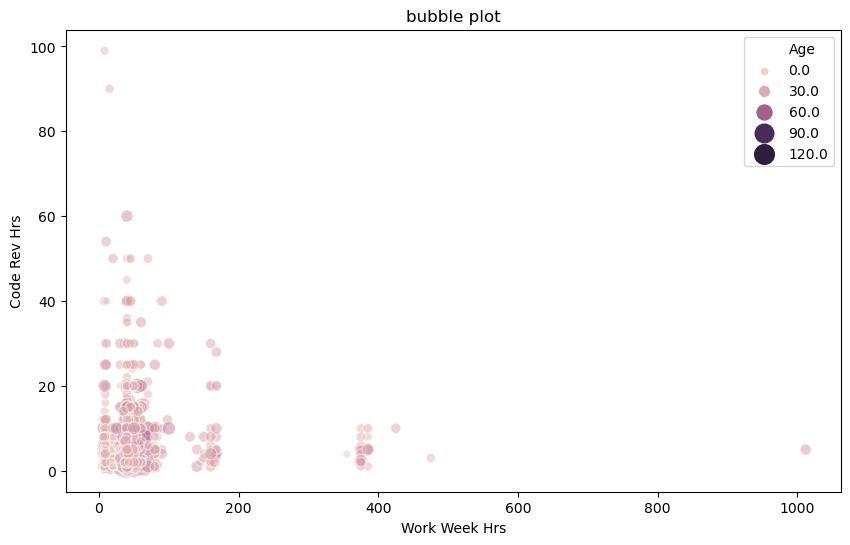

In [54]:
# your code goes here
plt.figure(figsize=(10,6))
sns.scatterplot(x='WorkWeekHrs', y='CodeRevHrs', size='Age', sizes=(20,200), hue='Age', data=df_data, alpha=0.5)
plt.ylabel('Code Rev Hrs')
plt.xlabel('Work Week Hrs')
plt.title('bubble plot')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


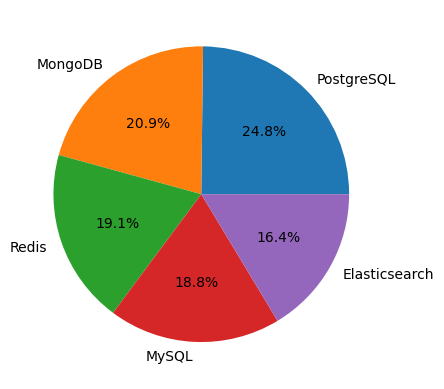

In [111]:
# your code goes here
#df_data.groupby(')[].sum()
#df_data.head()
#df_data.SOComm.value_counts()

QUERY_DB = '''SELECT * FROM DatabaseDesireNextYear'''
df_DB_nxtyr  = pd.read_sql_query(QUERY_DB,conn)
Top5DB = df_DB_nxtyr.DatabaseDesireNextYear.value_counts(sort=True, ascending=False)[0:5]
#e=df_DB_nxtyr.groupby('DatabaseDesireNextYear')['DatabaseDesireNextYear'].count()
#e.sort_values(ascending=False)
#plt.figure(figsize=(6,6))
labels = Top5DB.index
sizes = Top5DB.values

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%0.1f%%')
fig.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0.5, 1.0, 'stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')

<Figure size 1000x1000 with 0 Axes>

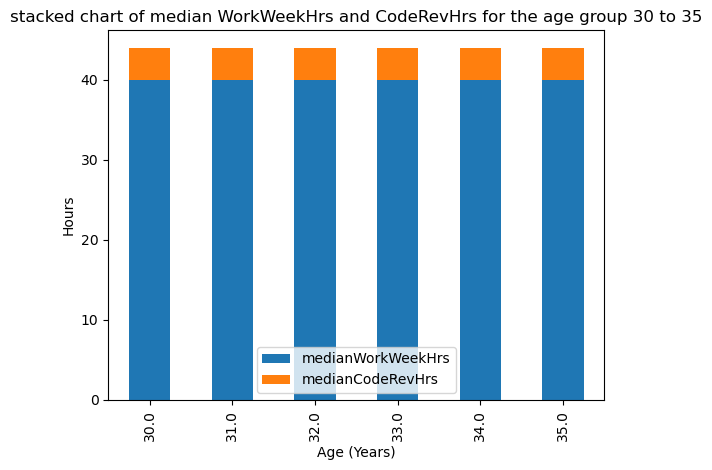

In [150]:
# your code goes here
#df_grouped = df_data.groupby(['CodeRevHrs','Age'],as_index=False)['WorkWeekHrs'].median()
#df_grouped
'''
QUERY_g = """
SELECT Age,COUNT(WorkWeekHrs),COUNT(CodeRevHrs)
FROM master
group by age
order by age
"""
df_g=pd.read_sql_query(QUERY_g,conn)
df_g
'''
df_g_wwh = df_data.groupby(['Age'],as_index=False)['WorkWeekHrs'].median()
#df_g_wwh
df_gwwh_a = df_g_wwh[(df_g_wwh.Age>=30) & (df_g_wwh.Age<=35)]

df_g_crh = df_data.groupby(['Age'],as_index=False)['CodeRevHrs'].median()
df_g_crh
df_gcrh_a = df_g_crh[(df_g_crh.Age>=30) & (df_g_crh.Age<=35)]
df_gcrh_a

df_g = df_gwwh_a.set_index('Age')
df_g['medianCodeRevHrs']=df_gcrh_a['CodeRevHrs'].values
df_g.rename(columns={'WorkWeekHrs':'medianWorkWeekHrs'},inplace=True)
plt.figure(figsize=(10,10))
df_g.plot.bar(stacked=True)
plt.ylabel('Hours')
plt.xlabel('Age (Years)')
plt.title('stacked chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


<Figure size 1000x1000 with 0 Axes>

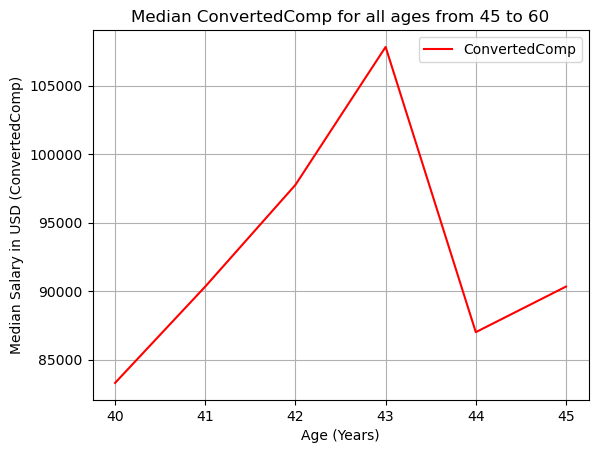

In [155]:
# your code goes here
df_g_cc = df_data.groupby(['Age'],as_index=False)['ConvertedComp'].median()
df_g_cc_a = df_g_cc[(df_g_cc.Age>=40) & (df_g_cc.Age<=45)]

plt.figure(figsize=(10,10))
df_g_cc_a.plot(x='Age',y='ConvertedComp',kind='line',color='red')
plt.ylabel('Median Salary in USD (ConvertedComp)')
plt.xlabel('Age (Years)')
plt.title('Median ConvertedComp for all ages from 45 to 60')
plt.grid(True)

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


['I am a developer by profession',
 'I am not primarily a developer, but I write code sometimes as part of my work']

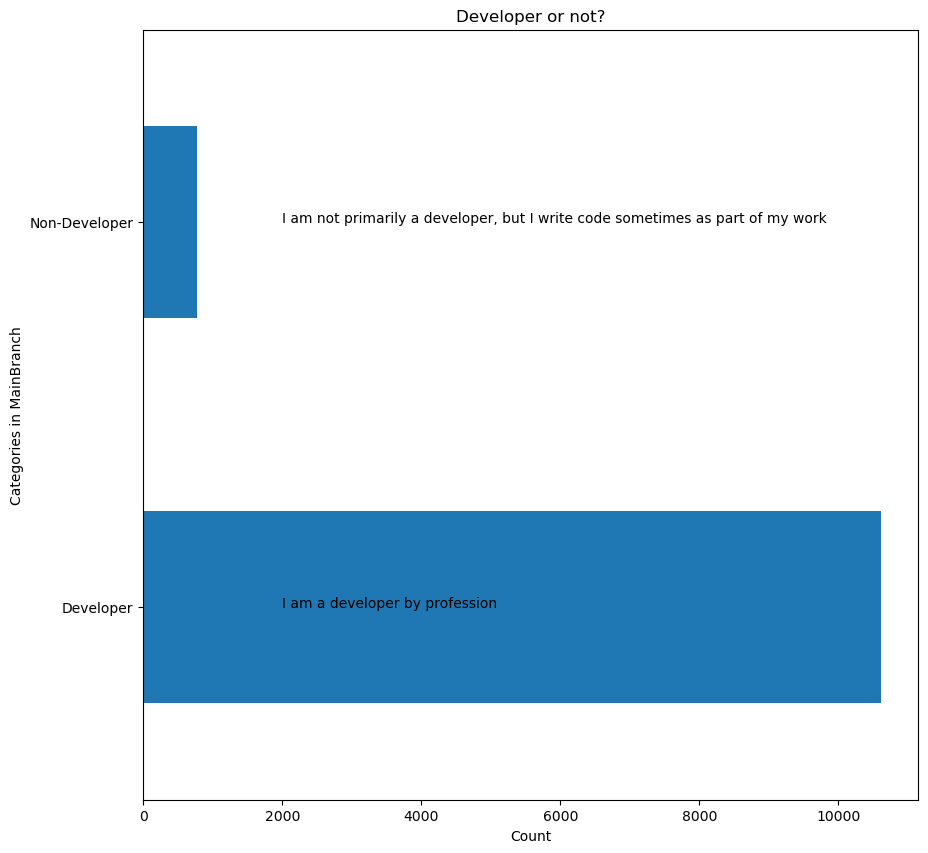

In [173]:
# your code goes here

plt.figure(figsize=(10,10))
df_data.MainBranch.value_counts().plot.barh()
plt.ylabel('Categories in MainBranch')
plt.xlabel('Count')
plt.title('Developer or not?')
plt.yticks(ticks=[0,1],labels=['Developer','Non-Developer'])
plt.annotate(xy=[2000,0],text=df_data.MainBranch.value_counts().index.tolist()[0])
plt.annotate(xy=[2000,1],text=df_data.MainBranch.value_counts().index.tolist()[1])


In [197]:
Q_lang = '''SELECT * FROM LanguageDesireNextYear'''
df_lang = pd.read_sql_query(Q_lang, conn)
df_lang['LanguageDesireNextYear'].value_counts()

JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
C++                      1633
Rust                     1520
PHP                      1457
WebAssembly              1397
Swift                    1179
Ruby                     1029
C                        1028
Scala                     879
R                         850
Other(s):                 836
F#                        621
Elixir                    620
Dart                      610
Clojure                   413
Assembly                  336
Objective-C               310
Erlang                    310
VBA                       149
Name: LanguageDesireNextYear, dtype: int64

In [7]:

Q_DB2 = '''SELECT * FROM DatabaseWorkedWith'''
df_DB2 = pd.read_sql_query(Q_DB2, conn)
df_DB2['DatabaseWorkedWith'].value_counts()
df_grp=df_DB2.groupby('Respondent')['DatabaseWorkedWith'].unique()
l1 = df_grp.values.tolist()
count=0
for arr in li:
    l2 = arr.tolist()
    if len(l2)==1:
        if l2[0]=='MySQL':
            count+=1
            
            
            
        


[array(['MySQL', 'SQLite'], dtype=object), array(['DynamoDB', 'PostgreSQL', 'SQLite'], dtype=object), array(['Couchbase', 'DynamoDB', 'Firebase', 'MySQL'], dtype=object), array(['MongoDB', 'Microsoft SQL Server', 'MySQL'], dtype=object), array(['MongoDB', 'PostgreSQL'], dtype=object), array(['DynamoDB', 'Firebase', 'Microsoft SQL Server', 'MySQL', 'SQLite'],
      dtype=object), array(['Elasticsearch', 'MariaDB', 'MongoDB', 'Microsoft SQL Server'],
      dtype=object), array(['Elasticsearch', 'MySQL', 'Oracle', 'Redis'], dtype=object), array(['Oracle', 'SQLite'], dtype=object), array(['Firebase', 'MongoDB', 'MySQL'], dtype=object), array(['MySQL'], dtype=object), array(['Microsoft SQL Server', 'MySQL', 'Redis', 'SQLite'], dtype=object), array(['Firebase', 'MongoDB', 'MySQL'], dtype=object), array(['MongoDB', 'PostgreSQL', 'Redis'], dtype=object), array(['Microsoft SQL Server'], dtype=object), array(['Microsoft SQL Server', 'PostgreSQL', 'Redis', 'SQLite'],
      dtype=object), array(['

In [6]:
import numpy as np
#df_grp[df_grp.values=='MySQL']
df_grp.values.tolist()==np.array(['MySQL'])


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [202]:
Q_DB3 = '''SELECT COUNT(Respondent) FROM DatabaseWorkedWith 
            GROUP BY Respondent 
            WHERE (DISTINCT DatabaseWorkedWith=='MySQL')
        '''
df_DB3 = pd.read_sql_query(Q_DB2, conn)

In [199]:

Q_lang2 = '''SELECT * FROM LanguageWorkedWith'''
df_lang2 = pd.read_sql_query(Q_lang2, conn)
df_lang2['LanguageWorkedWith'].value_counts()

JavaScript               8687
HTML/CSS                 7830
SQL                      7106
Bash/Shell/PowerShell    4642
Python                   4542
Java                     4506
C#                       4288
TypeScript               3232
PHP                      2913
C++                      1946
C                        1578
Ruby                     1149
Go                       1114
Other(s):                 840
Kotlin                    751
Swift                     707
VBA                       628
R                         585
Objective-C               518
Scala                     492
Assembly                  437
Rust                      324
Dart                      237
Elixir                    187
Clojure                   164
F#                        158
WebAssembly               133
Erlang                     98
Name: LanguageWorkedWith, dtype: int64

Close the database connection.


In [174]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
